# Create contact points for the TacTip sensor

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import results
import os

Let's create a dense gird of points on a plane:

In [157]:
nx = 60
ny = 60
r = 0.02

x = np.linspace(-r, +r, nx)
y = np.linspace(-r, +r, ny)
xv, yv = np.meshgrid(x, y)
grid_vecs = np.dstack((xv.ravel(),yv.ravel()))[0]

We want to filter out the points that do not lie inside a sphere with ray $r$

In [158]:
# Get the indices for the coordinates inside the sphere
indices_filter = np.where(grid_vecs[:, 0]**2 + grid_vecs[:, 1]**2 < r**2)

# Filter coordinates
grid_vecs_filtered = grid_vecs[indices_filter]

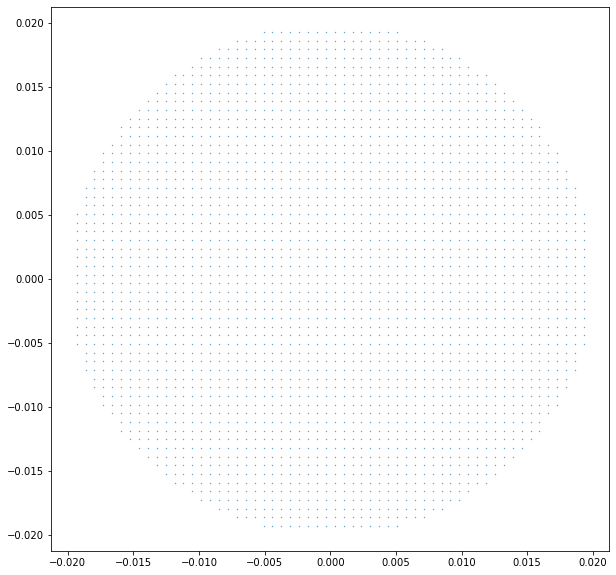

In [159]:
x = grid_vecs_filtered[:, 0]
y = grid_vecs_filtered[:, 1]

plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=0.1)

In [160]:
x.shape[0]

2724

Finally, the z is computed knowing that:
$$x^2 + y^2 + z^2 = r^2 $$

In [161]:
z_squared = r**2 - x**2 - y**2

z = np.sqrt(z_squared)

In [162]:
coords_sphere = np.array([x, y, z]).transpose(1, 0)

Let's plot it:

In [163]:
fig = go.Figure(
    [
        go.Scatter3d(x=coords_sphere[:, 0], y=coords_sphere[:, 1], z=coords_sphere[:, 2], mode='markers', marker=dict(size=2))]
)
fig.show()

In [164]:
path = os.path.join(os.path.dirname(results.__file__), 'tactip_contact_points.npy')
np.save(path, coords_sphere)

## Analyse TacTip skin and core

In [125]:
import trimesh

In [127]:
skin_path = '/Users/ri21540/Documents/PhD/Code/tactile_gym/tactile_gym/assets/robot_assets/tactip/standard_tactip/tip/skin.obj'
core_path = '/Users/ri21540/Documents/PhD/Code/tactile_gym/tactile_gym/assets/robot_assets/tactip/standard_tactip/tip/core.obj'

skin_mesh = trimesh.load(skin_path)
core_mesh = trimesh.load(core_path)

In [137]:
skin_verts = skin_mesh.vertices
fig = go.Figure(
    [
        go.Scatter3d(x=skin_verts[:, 0], y=skin_verts[:, 1], z=skin_verts[:, 2], mode='markers', marker=dict(size=2))]
)
fig.show()

print(np.amax(skin_verts[:, 0]))

0.02
